In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib


In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df = df.dropna().reset_index(drop=True)


In [4]:
df["person_home_ownership"] = df["person_home_ownership"].replace(
    {"MORTGAGE": "RENT"}
)


In [5]:
features = [
    "person_age",
    "person_income",
    "person_emp_length",
    "person_home_ownership",
    "loan_percent_income"
]

target = "loan_status"

df_model = df[features + [target]].copy()


In [6]:
le_home = LabelEncoder()
df_model["person_home_ownership"] = le_home.fit_transform(
    df_model["person_home_ownership"]
)

joblib.dump(le_home, "person_home_ownership_encoder.pkl")


['person_home_ownership_encoder.pkl']

In [7]:
X = df_model.drop(columns=target)
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
dt = DecisionTreeClassifier(
    criterion="entropy",        # Information Gain
    max_depth=4,                # Overfitting control
    min_samples_leaf=25,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=25, random_state=42)

In [9]:
print("Train Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

print("\nClassification Report:\n")
print(classification_report(y_test, dt.predict(X_test)))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, dt.predict(X_test)))


Train Accuracy: 0.8058926233085989
Test Accuracy: 0.7999301675977654

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4487
           1       0.54      0.57      0.55      1241

    accuracy                           0.80      5728
   macro avg       0.71      0.72      0.71      5728
weighted avg       0.80      0.80      0.80      5728


Confusion Matrix:

[[3877  610]
 [ 536  705]]


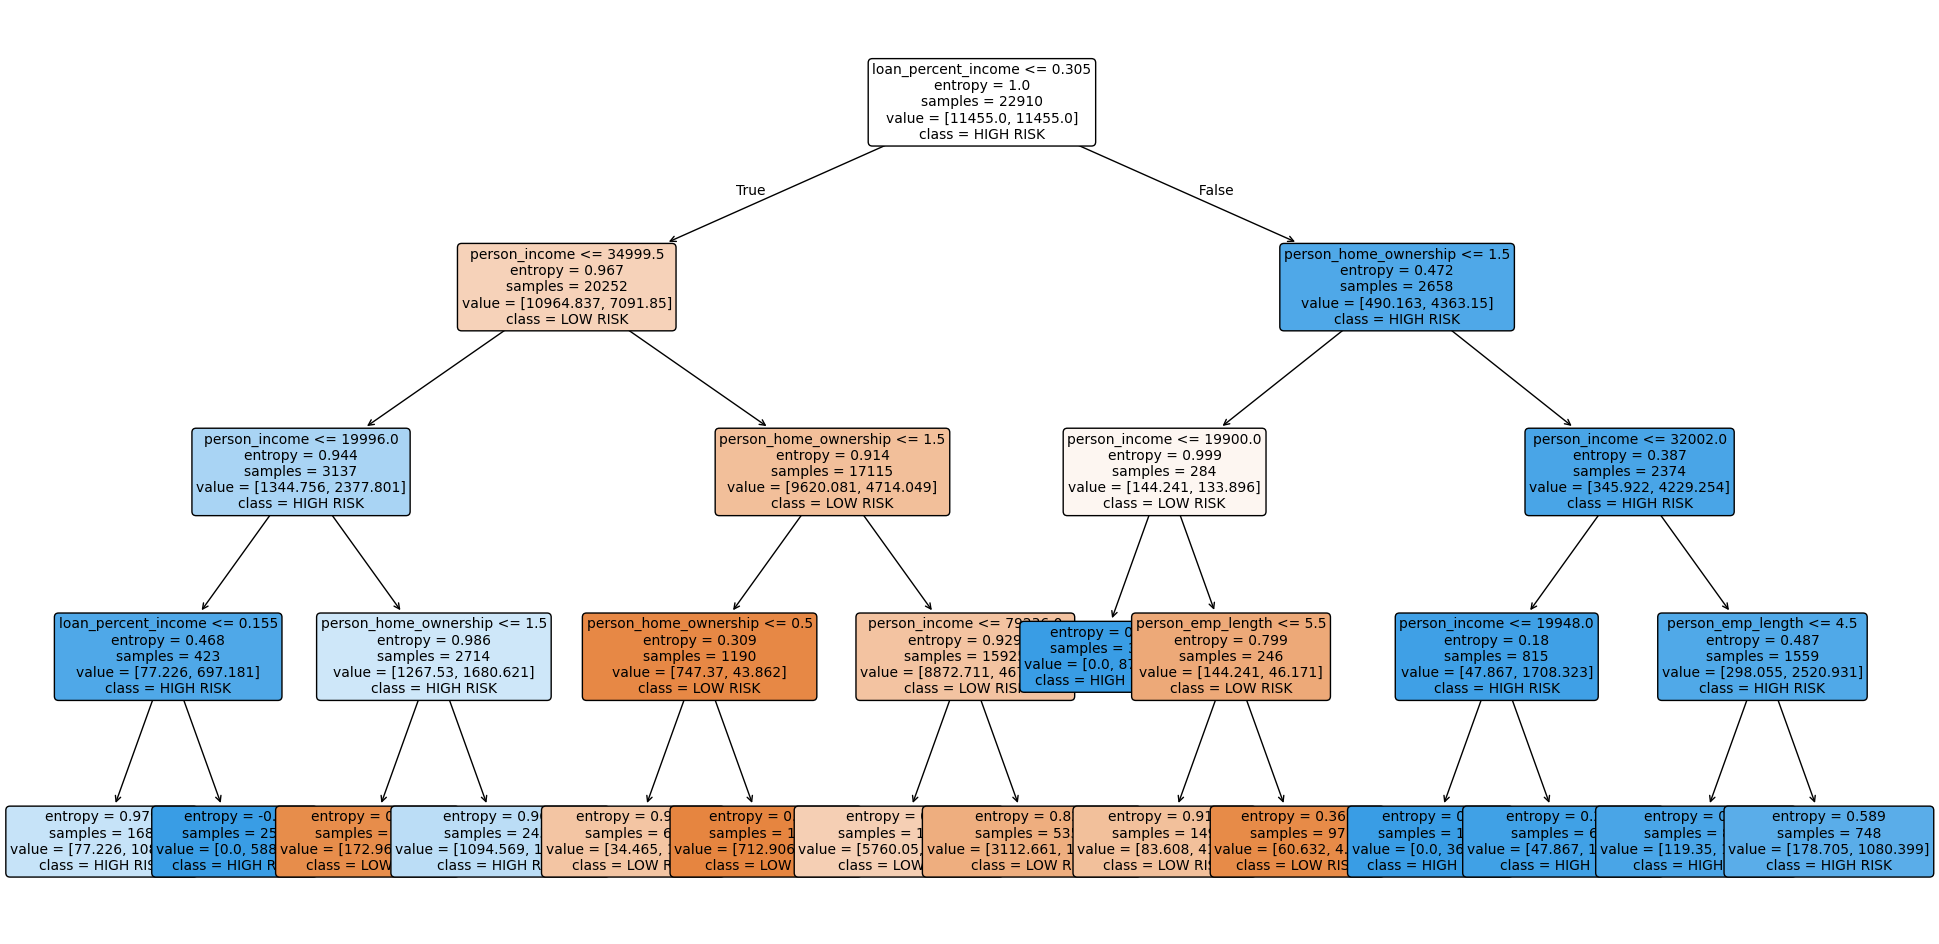

In [10]:
plt.figure(figsize=(24, 12))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["LOW RISK", "HIGH RISK"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [11]:
joblib.dump(dt, "decision_tree_credit_model.pkl")


['decision_tree_credit_model.pkl']